<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
- Whether the diagnosis is malignant or benign

## Actual Question
Choose the **one** question that should be answered.
- Whether the diagnosis is malignant or benign

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, roc_curve, precision_score, auc
import sklearn.metrics as metrics

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

from sklearn.utils import resample

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = '../DATA/breast-cancer-wisconsin-data-old.csv'
columns = [
    'Sample_Number',
    'Clump_Thickness',
    'Uniformity_of_Cell_Size',
    'Uniformity_of_Cell_Shape',
    'Marginal_Adhesion',
    'Single_Epithelial_Cell_Size',
    'Bare_Nuclei',
    'Bland_Chromatin',
    'Normal_Nucleoli',
    'Mitoses',
    'Class'
]

df = pd.read_csv(file, names = columns)
df.head()

,Sample_Number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
print('Number of observations ', df.shape[0])

Number of observations  699


In [4]:
print('Number of features ', df.shape[1])

Number of features  11


In [5]:
df.set_index('Sample_Number', inplace = True)

In [6]:
df.describe()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
df.dtypes

Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [8]:
df['Bare_Nuclei']  = pd.to_numeric(df['Bare_Nuclei'], errors = 'coerce')

In [9]:
for column in df.columns:
    print(f'{column}')
    print(f'Min: {df[column].min()}  Max:   {df[column].max()} ')
    print('Unique Values:')
    print(df[column].unique())
    print(' ')

Clump_Thickness
Min: 1  Max:   10 
Unique Values:
[ 5  3  6  4  8  1  2  7 10  9]
 
Uniformity_of_Cell_Size
Min: 1  Max:   10 
Unique Values:
[ 1  4  8 10  2  3  7  5  6  9]
 
Uniformity_of_Cell_Shape
Min: 1  Max:   10 
Unique Values:
[ 1  4  8 10  2  3  5  6  7  9]
 
Marginal_Adhesion
Min: 1  Max:   10 
Unique Values:
[ 1  5  3  8 10  4  6  2  9  7]
 
Single_Epithelial_Cell_Size
Min: 1  Max:   10 
Unique Values:
[ 2  7  3  1  6  4  5  8 10  9]
 
Bare_Nuclei
Min: 1.0  Max:   10.0 
Unique Values:
[ 1. 10.  2.  4.  3.  9.  7. nan  5.  8.  6.]
 
Bland_Chromatin
Min: 1  Max:   10 
Unique Values:
[ 3  9  1  2  4  5  7  8  6 10]
 
Normal_Nucleoli
Min: 1  Max:   10 
Unique Values:
[ 1  2  7  4  5  3 10  6  9  8]
 
Mitoses
Min: 1  Max:   10 
Unique Values:
[ 1  5  4  2  3  7 10  8  6]
 
Class
Min: 2  Max:   4 
Unique Values:
[2 4]
 


<AxesSubplot:>

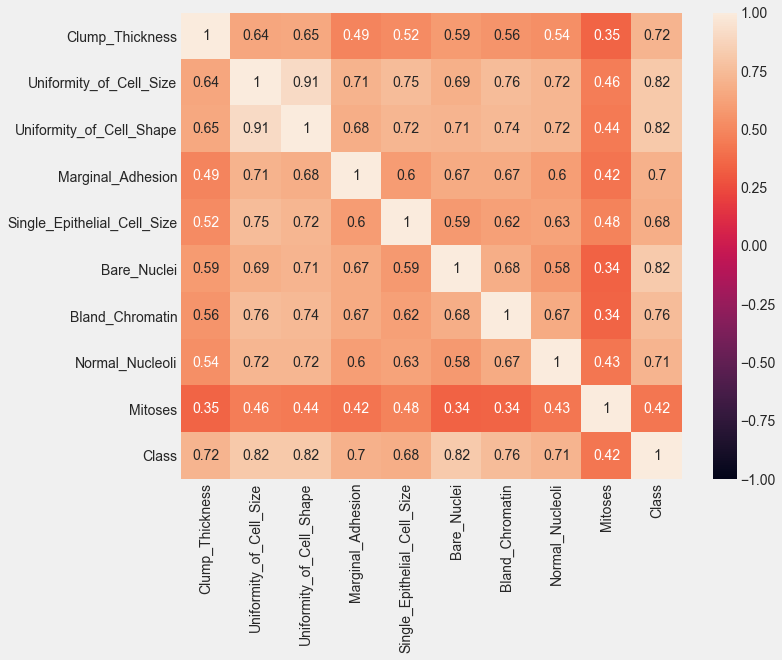

In [10]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(),vmin = -1, vmax = 1, annot = True)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [11]:
# Convert the DataFrame object into NumPy array

values = df.values

# Define the criteria for dealing with missing values
imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'median'
)

imputedData = imputer.fit_transform(values)

In [12]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_value = scaler.fit_transform(imputedData)
df_n = pd.DataFrame.from_records(scaled_value, columns = df.columns)
df_n.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,0.0


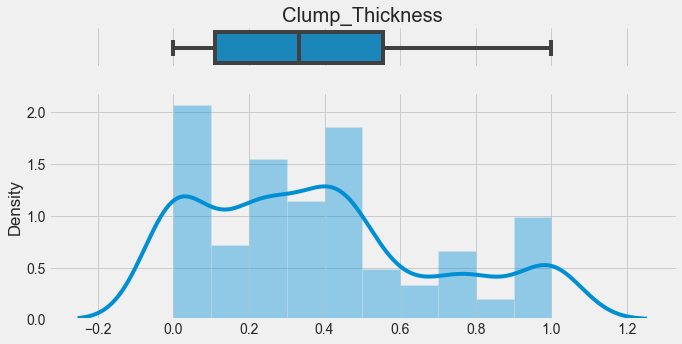

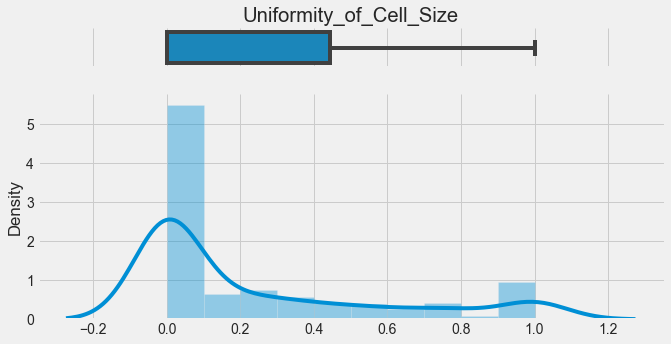

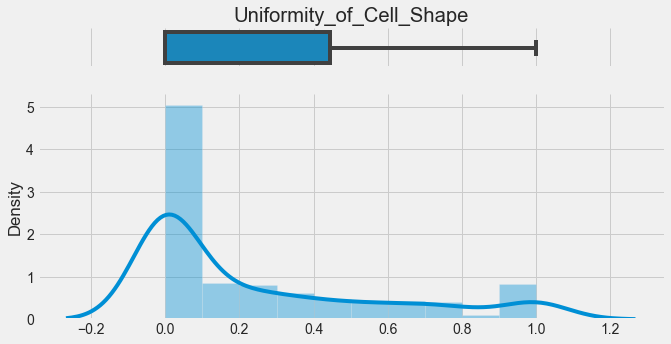

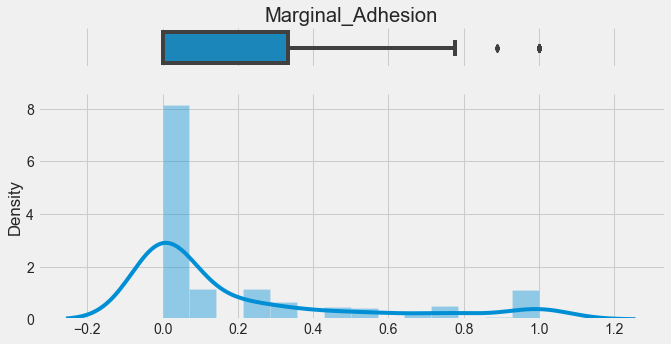

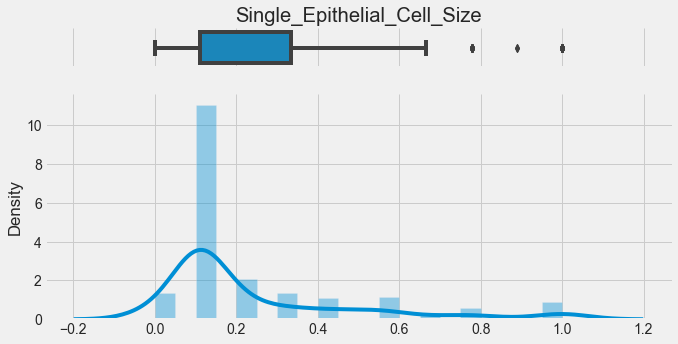

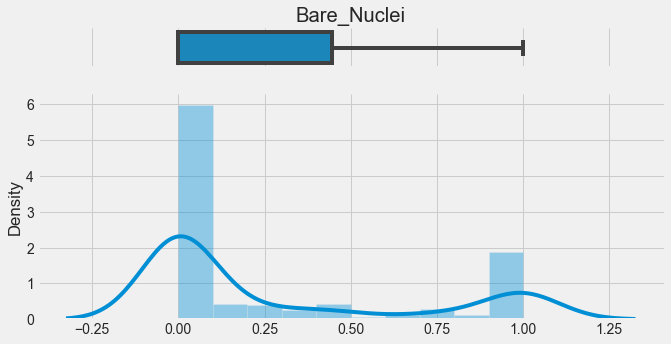

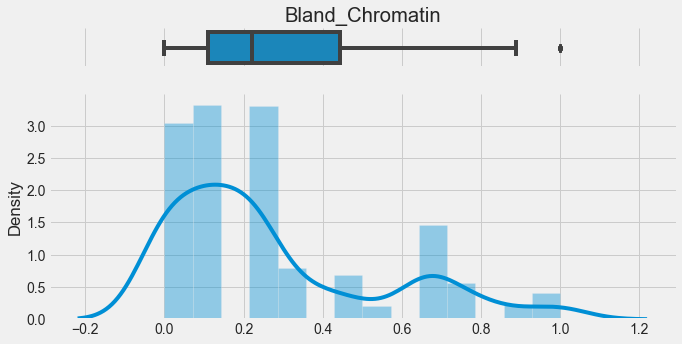

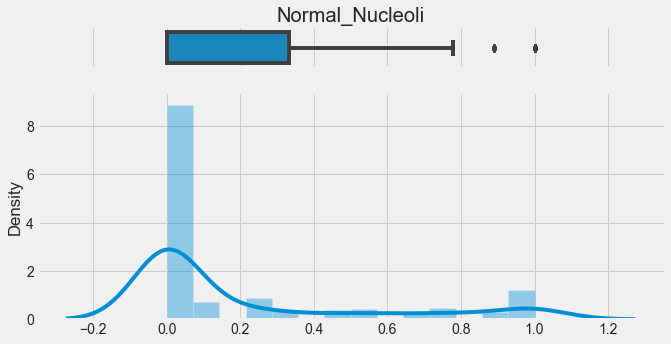

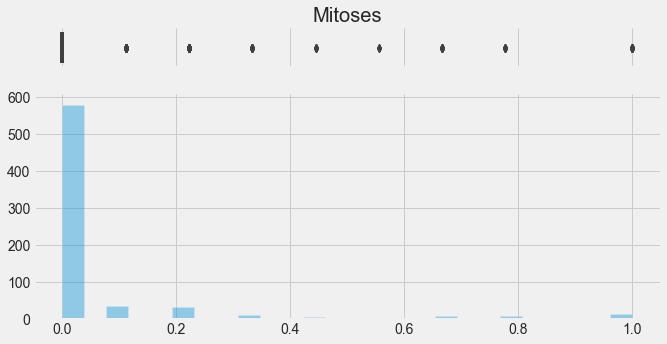

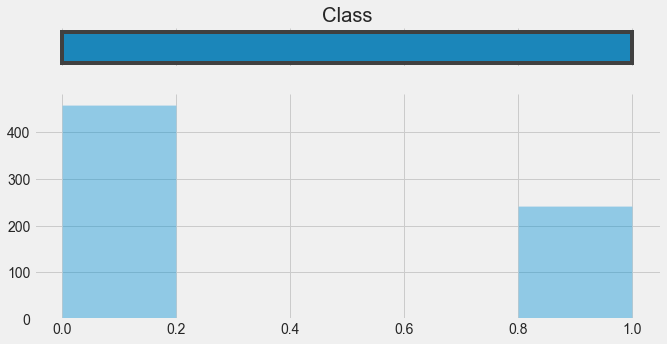

In [13]:
# Check if there is outlier
for c in df_n.columns:

    fig, ax = plt.subplots(2, 
                           figsize = (10, 5), 
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})
    
    ax_box = ax[0]
    ax_box = sns.boxplot(df_n[c], ax = ax_box)
    ax_box.set(title = c, yticks= [], xlabel = '')
    sns.despine(ax = ax_box, left = True)
    
    ax_hist = ax[1]
    if c not in  ['Class', 'Mitoses']:
        ax_hist = sns.distplot(df_n[c], ax = ax_hist)
    else:
        ax_hist = sns.distplot(df_n[c], ax = ax_hist, kde = False)
    
    ax_hist.set(xlabel = '')
    sns.despine(ax = ax_hist)
    
plt.show()

In [14]:
# Define predictor and target

target = 'Class'
X = df_n.drop(columns = target)
y = df_n[target]

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [15]:
print('- What are the input variables (features)?')
print(f'  - %s' % ', '.join(X.columns))
print('- Is there an output variable (label)?')
print(' - %s' % ('yes' if target else 'No'))
print(' - %s' % target)
print(' - %s' % y.dtypes)
print('- What type of Modelling is it?')
print(' - [%s] Supervised' % ('x' if target else ' '))
print(' - [%s] Unsupervised' % (' ' if target else 'x'))
print('- What type of modelling is it?')
print(' - [%s] Regression' % ('x' if y.dtypes == 'object' else ' '))
print(' - [%s] Classification (binary)' % ('x' if (y.dtype != 'object') and (len(y.unique()) == 2) else ' '))
print(' - [%s] Classification (multi-class)' % ('x' if(y.dtype == 'object') and (len(y.unique()) != 2) else ' '))
print(' - [%s] Clustering' % (' ' if target else 'x'))

- What are the input variables (features)?
  - Clump_Thickness, Uniformity_of_Cell_Size, Uniformity_of_Cell_Shape, Marginal_Adhesion, Single_Epithelial_Cell_Size, Bare_Nuclei, Bland_Chromatin, Normal_Nucleoli, Mitoses
- Is there an output variable (label)?
 - yes
 - Class
 - float64
- What type of Modelling is it?
 - [x] Supervised
 - [ ] Unsupervised
- What type of modelling is it?
 - [ ] Regression
 - [x] Classification (binary)
 - [ ] Classification (multi-class)
 - [ ] Clustering


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1122030, stratify = y)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [17]:
# Use Decision Tree

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
results = cross_val_score(tree, X_train, y_train, cv= kfold)
print('Decision Tree, Cross-Validation mean: %.4f' %results.mean())

Decision Tree, Cross-Validation mean: 0.9306


In [18]:
ada_boost_clf = AdaBoostClassifier(n_estimators = 30)
ada_boost_clf.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=30)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [19]:

def evaluate(model, X_train, X_test, y_train, y_test):
   
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print('Accuracy score:            %.4f' % accuracy_score(y_test, y_test_pred))
    print('Precision score:           %.4f' % precision_score(y_test, y_test_pred))
    print('TRAINING RESULTS: \n==========================================')
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
    print(f'TRAINING SCORE: {model.score(X_train, y_train)}')
    print(f'CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}')
    print(f'ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred)}')
    print(f'CLASSIFICATION REPORT:\n{clf_report}')
    
    print('TESTING RESULTS: \n==========================================')
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
    print(f'TEST SCORE: {model.score(X_test, y_test)}')
    print(f'CONFUSION MATRIX: \n{confusion_matrix(y_test, y_test_pred)}')
    print(f'ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}')
    print(f'CLASSIFICATION REPORT:\n{clf_report}')
    
    # roc curve
    
    y_test_pred_proba = model.predict_proba(X_test)
    y_train_pred_proba = model.predict_proba(X_train)
    
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba[:, 1])
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba[:, 1])
        
    plt.figure(figsize = [15, 15])
    
    test_model_auc = auc(fpr_test, tpr_test)
    train_model_auc = auc(fpr_train, tpr_train)
    
    plt.plot(fpr_test, tpr_test,  label = 'ROC test curve model (area = %0.5f)' %test_model_auc, linewidth = 4)
    plt.plot(fpr_train, tpr_train,  label = 'ROC train curve model (area = %0.5f)' %train_model_auc, linewidth = 4)
    
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 18)
    plt.ylabel('True Positive Rate', fontsize = 18)
    plt.title('Receiver Operating Characteristic: M', fontsize = 18)
    plt.legend(loc = 'lower right')
    plt.show()

Accuracy score:            0.9524
Precision score:           0.9697
TRAINING RESULTS: 
TRAINING SCORE: 0.983640081799591
CONFUSION MATRIX:
[[317   3]
 [  5 164]]
ACCURACY SCORE:
0.983640081799591
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.984472    0.982036   0.98364    0.983254      0.983630
recall       0.990625    0.970414   0.98364    0.980520      0.983640
f1-score     0.987539    0.976190   0.98364    0.981865      0.983617
support    320.000000  169.000000   0.98364  489.000000    489.000000
TESTING RESULTS: 
TEST SCORE: 0.9523809523809523
CONFUSION MATRIX: 
[[136   2]
 [  8  64]]
ACCURACY SCORE:
0.9524
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.944444   0.969697  0.952381    0.957071      0.953102
recall       0.985507   0.888889  0.952381    0.937198      0.952381
f1-score     0.964539   0.927536  0.952381    0.946038      0.951852
support    138.000

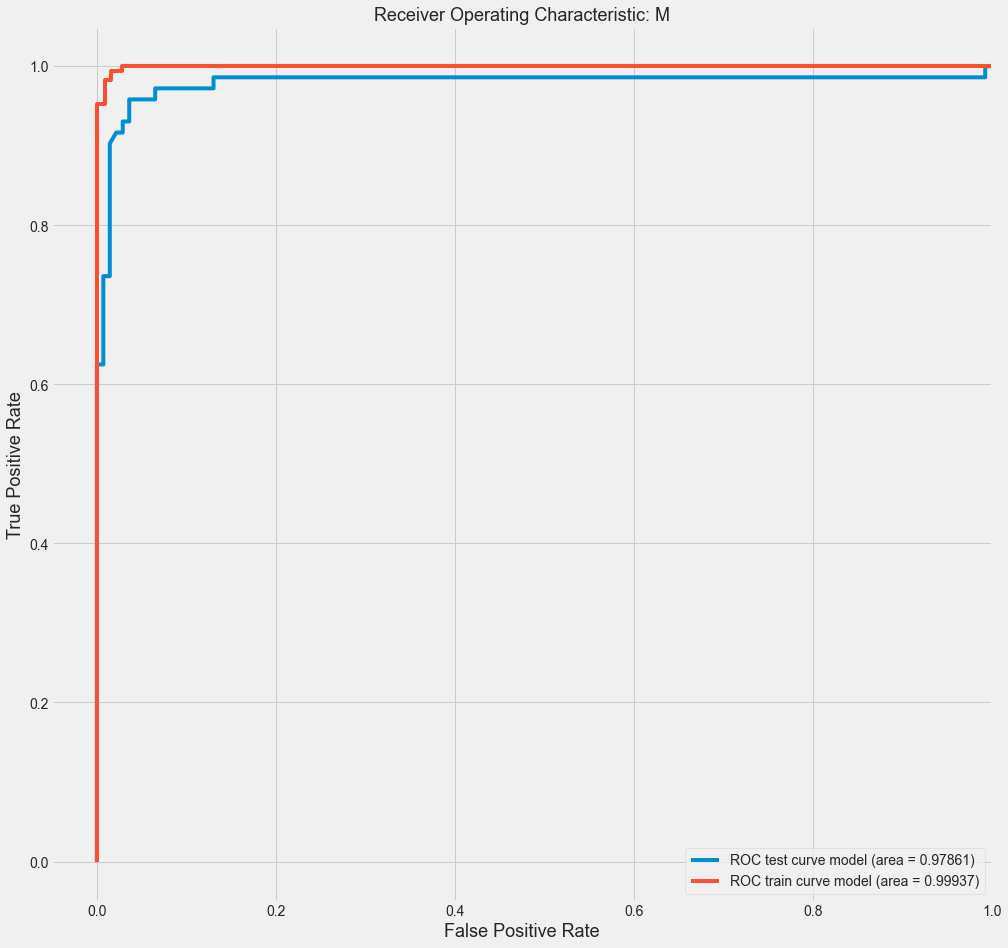

In [20]:
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



